# 1.1


Results:
alpha0    Minimizer                     Final Value    Iterations
1         [-49.  36.]                   0.00000000     1         
0.9       [-49.  36.]                   0.00000000     13        
0.75      [-49.  36.]                   0.00000000     21        
0.6       [-49.  36.]                   0.00000000     32        
0.5       [-49.  36.]                   0.00000000     1         
0.4       [-49.  36.]                   0.00000000     18        
0.25      [-49.  36.]                   0.00000000     42        
0.1       [-49.  36.]                   0.00000000     130       
0.01      [-49.  36.]                   0.00000000     1426      


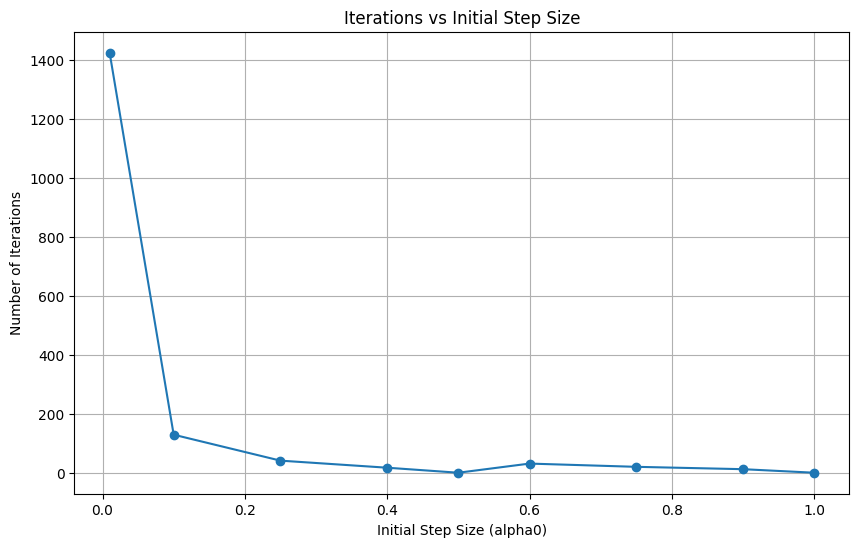

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function and its gradient
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

# Backtracking line search
def backtrack_line_search(x, p, grad, alpha0, rho=0.5, gamma=0.5):
    alpha = alpha0
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

# Gradient Descent with Backtracking
def gradient_descent(x0, tau, alpha0, rho=0.5, gamma=0.5):
    x = np.array(x0)
    k = 0
    grad = grad_g(x)
    p = -grad
    iterations = []

    while np.linalg.norm(p) > tau:
        alpha = backtrack_line_search(x, p, grad, alpha0, rho, gamma)
        x = x + alpha * p
        grad = grad_g(x)
        p = -grad
        k += 1
        iterations.append((k, x.copy(), g(x), alpha))

    return x, g(x), k, iterations

# Parameters
x0 = [100, 100]
tau = 1e-10
alpha0_vals = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

results = []

for alpha0 in alpha0_vals:
    min_x, final_val, iters, _ = gradient_descent(x0, tau, alpha0)
    results.append((alpha0, min_x, final_val, iters))

# Print results
print("\nResults:")
print(f"{'alpha0':<10}{'Minimizer':<30}{'Final Value':<15}{'Iterations':<10}")
for a0, min_x, final_val, iters in results:
    print(f"{a0:<10}{str(min_x):<30}{final_val:<15.8f}{iters:<10}")

# Plotting iterations vs initial step size
plt.figure(figsize=(10, 6))
plt.plot([res[0] for res in results], [res[3] for res in results], marker='o')
plt.xlabel('Initial Step Size (alpha0)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Initial Step Size')
plt.grid(True)
plt.show()


# 1.2

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

# Gradient Descent with Fixed Step Length
def gd_fixed_step(x0, tau, alpha):
    x = np.array(x0)
    k = 0
    grad = grad_g(x)
    p = -grad
    iters = []

    while np.linalg.norm(p) > tau:
        x = x + alpha * p
        grad = grad_g(x)
        p = -grad
        k += 1
        iters.append((k, x.copy(), g(x)))

    return x, g(x), k, iters

# Parameters
x0 = [100, 100]
tau = 1e-10
alpha_fixed = 0.25

# Run the fixed step length gradient descent
minimizer_fixed, final_value_fixed, num_iters_fixed, iter_data_fixed = gd_fixed_step(x0, tau, alpha_fixed)

# Print results for fixed step length
print("\nResults:")
print(f"{'Stepsize':<10}||{'  Minimizer':<12}||{' Final Value':<13}||{' Iterations':<10}")
print(f"{alpha_fixed:<10}{str(minimizer_fixed):<18}{final_value_fixed:<15.8f}{num_iters_fixed:<90}")


Results:
Stepsize  ||  Minimizer || Final Value || Iterations
0.25      [-49.  36.]       0.00000000     42                                                                                        


# 1.3


Fixed Step Results:
Step Size Minimizer                     Final Value    Iterations
0.01      [-49.  36.]                   0.00000000     1426      

Backtracking Results:
Step Size Minimizer                     Final Value    Iterations
0.5       [-49.  36.]                   0.00000000     1         


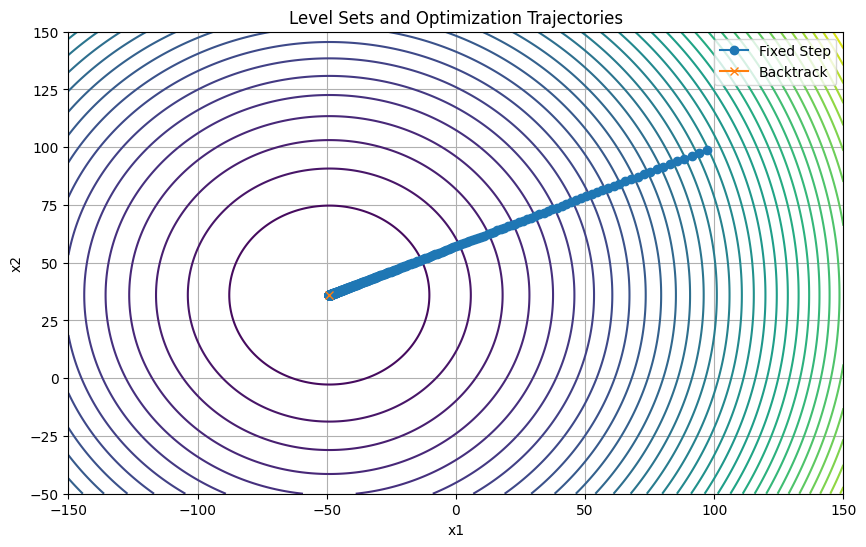

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

# Backtracking line search
def backtrack_ls(x, p, grad, a0, rho=0.5, gam=0.5):
    a = a0
    while g(x + a * p) > g(x) + gam * a * np.dot(grad, p):
        a *= rho
    return a

# Gradient Descent with Backtracking Line Search
def gd_backtrack(x0, tol, a0, rho=0.5, gam=0.5):
    x = np.array(x0)
    k = 0
    grad = grad_g(x)
    p = -grad
    hist = []

    while np.linalg.norm(p) > tol:
        a = backtrack_ls(x, p, grad, a0, rho, gam)
        x = x + a * p
        grad = grad_g(x)
        p = -grad
        k += 1
        hist.append((k, x.copy(), g(x)))

    return x, g(x), k, hist

# Gradient Descent with Fixed Step Length
def gd_fixed(x0, tol, a):
    x = np.array(x0)
    k = 0
    grad = grad_g(x)
    p = -grad
    hist = []

    while np.linalg.norm(p) > tol:
        x = x + a * p
        grad = grad_g(x)
        p = -grad
        k += 1
        hist.append((k, x.copy(), g(x)))

    return x, g(x), k, hist

# Parameters
x0 = [100, 100]
tol = 1e-10
a_fix = 0.01
a0_bt = 0.5

# Run the fixed step length gradient descent
min_fix, fval_fix, it_fix, hist_fix = gd_fixed(x0, tol, a_fix)

# Run the backtracking line search gradient descent
min_bt, fval_bt, it_bt, hist_bt = gd_backtrack(x0, tol, a0_bt)

# Print results
print("\nFixed Step Results:")
print(f"{'Step Size':<10}{'Minimizer':<30}{'Final Value':<15}{'Iterations':<10}")
print(f"{a_fix:<10}{str(min_fix):<30}{fval_fix:<15.8f}{it_fix:<10}")

print("\nBacktracking Results:")
print(f"{'Step Size':<10}{'Minimizer':<30}{'Final Value':<15}{'Iterations':<10}")
print(f"{a0_bt:<10}{str(min_bt):<30}{fval_bt:<15.8f}{it_bt:<10}")

# Plot level sets and trajectories
x1 = np.linspace(-150, 150, 500)
x2 = np.linspace(-50, 150, 500)
x1_m, x2_m = np.meshgrid(x1, x2)
z = g([x1_m, x2_m])

traj_fix = np.array([h[1] for h in hist_fix])
traj_bt = np.array([h[1] for h in hist_bt])

plt.figure(figsize=(10, 6))
plt.contour(x1_m, x2_m, z, levels=50, cmap='viridis')
plt.plot(traj_fix[:, 0], traj_fix[:, 1], marker='o', label='Fixed Step')
plt.plot(traj_bt[:, 0], traj_bt[:, 1], marker='x', label='Backtrack')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Optimization Trajectories')
plt.legend()
plt.grid(True)
plt.show()


# 1.4

Here since the tolerance value is low and we have no limit to the number of epochs/iterations the code keeps on running as the number of iterations required to converge to the optimal value are way to high. In order to run the code taking the value of tau = 1 but this does not gives the optimal value and the optimizer.

Fixing the number of iterations give this output

<ipython-input-58-7bcd1e3d813e>:6: RuntimeWarning: overflow encountered in scalar multiply
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2



Results:
alpha0    Minimizer                     Final Value    Iterations
1         [ 10.0445236  100.89383907]   64.71485082    10000     
0.9       [ 10.04448341 100.89329499]   64.71440862    10000     
0.75      [ 10.04071235 100.81735054]   64.65359039    10000     
0.6       [ 9.99780764 99.95768896]     63.96552738    10000     
0.5       [ 10.0445236  100.89383907]   64.71485082    10000     
0.4       [ 10.04208509 100.84499371]   64.67572465    10000     
0.25      [ 10.0445236  100.89383907]   64.71485082    10000     
0.1       [ 10.04208509 100.84499371]   64.67572465    10000     
0.01      [ 9.81510594 96.33786137]     61.07650126    10000     


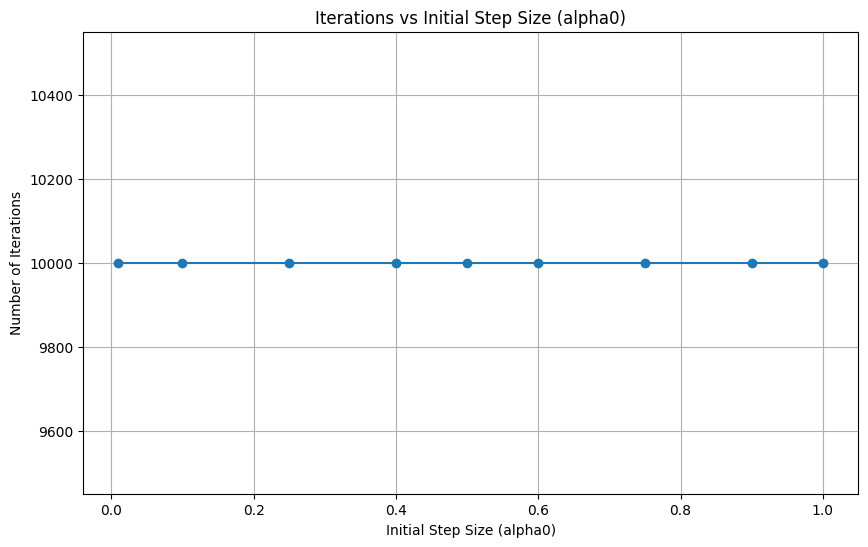

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def g(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def grad_g(x):
    grad_x1 = -1024 * (x[1] - x[0]**2) * x[0] - 2 * (2 - x[0])
    grad_x2 = 512 * (x[1] - x[0]**2)
    return np.array([grad_x1, grad_x2])

# Backtracking line search
def backtracking_line_search(x, p, grad, alpha0, rho=0.5, gamma=0.5):
    alpha = alpha0
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

# Gradient Descent with Backtracking Line Search
def gradient_descent_with_backtracking(x0, tau, alpha0, rho=0.5, gamma=0.5):
    x = np.array(x0)
    k = 0
    grad = grad_g(x)
    p = -grad
    iterations = []

    # while np.linalg.norm(p) > tau:
    while np.linalg.norm(p) > 1e-10  and len(iterations) < 10000:
        alpha = backtracking_line_search(x, p, grad, alpha0, rho, gamma)
        x = x + alpha * p
        grad = grad_g(x)
        p = -grad
        k += 1
        iterations.append((k, x.copy(), g(x), alpha))

    return x, g(x), k, iterations

# Parameters
x0 = [100, 100]
tau = 1e-10
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Run the algorithm for different alpha0 and record results
results = []

for alpha0 in alpha0_values:
    minimizer, final_value, num_iterations, _ = gradient_descent_with_backtracking(x0, tau, alpha0)
    results.append((alpha0, minimizer, final_value, num_iterations))

# Print results
print("\nResults:")
print(f"{'alpha0':<10}{'Minimizer':<30}{'Final Value':<15}{'Iterations':<10}")
for alpha0, minimizer, final_value, num_iterations in results:
    print(f"{alpha0:<10}{str(minimizer):<30}{final_value:<15.8f}{num_iterations:<10}")

# Plot number of iterations vs alpha0
alpha0_vals = [res[0] for res in results]
iterations = [res[3] for res in results]

plt.figure(figsize=(10, 6))
plt.plot(alpha0_vals, iterations, marker='o')
plt.xlabel('Initial Step Size (alpha0)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Initial Step Size (alpha0)')
plt.grid(True)
plt.show()


If we do not fix the iterations and change the tolerance level instead we get:

<ipython-input-36-d7e6b11534bd>:6: RuntimeWarning: overflow encountered in scalar multiply
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2



Results:
alpha0    Minimizer                     Final Value    Iterations
1         [ 10.04940666 100.99210581]   64.79354809    16        
0.9       [ 10.04949728 100.9939134 ]   64.79499622    17        
0.75      [ 10.04974899 100.99904371]   64.79910514    21        
0.6       [ 10.04897744 100.98349624]   64.78665180    13        
0.5       [ 10.04940666 100.99210581]   64.79354809    16        
0.4       [ 10.04966472 100.99734678]   64.79774588    20        
0.25      [ 10.04940666 100.99210581]   64.79354809    16        
0.1       [ 10.04966472 100.99734678]   64.79774588    20        
0.01      [ 10.04877467 100.97944045]   64.78340316    22        


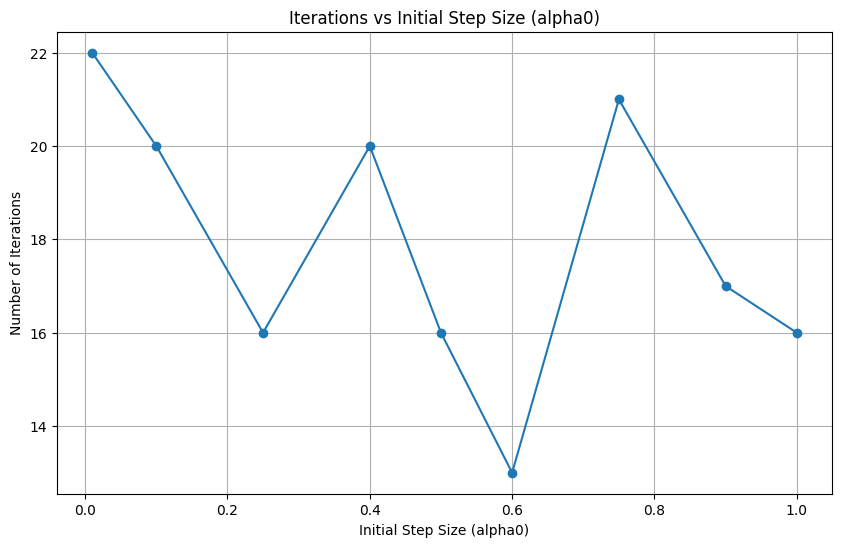

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def g(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def grad_g(x):
    grad_x1 = -1024 * (x[1] - x[0]**2) * x[0] - 2 * (2 - x[0])
    grad_x2 = 512 * (x[1] - x[0]**2)
    return np.array([grad_x1, grad_x2])

# Backtracking line search
def backtracking_line_search(x, p, grad, alpha0, rho=0.5, gamma=0.5):
    alpha = alpha0
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

# Gradient Descent with Backtracking Line Search
def gradient_descent_with_backtracking(x0, tau, alpha0, rho=0.5, gamma=0.5):
    x = np.array(x0)
    k = 0
    grad = grad_g(x)
    p = -grad
    iterations = []

    while np.linalg.norm(p) > tau:
    #while np.linalg.norm(p) > 1e-10  and len(iterations) < 10000:
        alpha = backtracking_line_search(x, p, grad, alpha0, rho, gamma)
        x = x + alpha * p
        grad = grad_g(x)
        p = -grad
        k += 1
        iterations.append((k, x.copy(), g(x), alpha))

    return x, g(x), k, iterations

# Parameters
x0 = [100, 100]
tau = 1
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Run the algorithm for different alpha0 and record results
results = []

for alpha0 in alpha0_values:
    minimizer, final_value, num_iterations, _ = gradient_descent_with_backtracking(x0, tau, alpha0)
    results.append((alpha0, minimizer, final_value, num_iterations))

# Print results
print("\nResults:")
print(f"{'alpha0':<10}{'Minimizer':<30}{'Final Value':<15}{'Iterations':<10}")
for alpha0, minimizer, final_value, num_iterations in results:
    print(f"{alpha0:<10}{str(minimizer):<30}{final_value:<15.8f}{num_iterations:<10}")

# Plot number of iterations vs alpha0
alpha0_vals = [res[0] for res in results]
iterations = [res[3] for res in results]

plt.figure(figsize=(10, 6))
plt.plot(alpha0_vals, iterations, marker='o')
plt.xlabel('Initial Step Size (alpha0)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Initial Step Size (alpha0)')
plt.grid(True)
plt.show()
